Poniższy skrypt służy do analizy danych z pliku star_classification.csv. Badane są braki danych, rozkłady zmiennych, wykresy pudełkowe.
# Importowanie bibliotek

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Wczytanie danych
Dane zostały wczytane z plików csv stworzonych w skrypcie "Prepare_sets".

In [2]:
data = pd.read_csv("star_classification.csv")
X_train = pd.read_csv("X_train.csv")
X_test = pd.read_csv("X_test.csv")
y_train = pd.read_csv("y_train.csv")
y_test = pd.read_csv("y_test.csv")

# Analiza danych

### Podstawowe informacje o danych

Pierwsze pięć wierszy danych

In [3]:
data.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


Informacje na temat dannych w kategoriach: nazwa kolumny, ilość wartości niepustych, typ danych

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

### Analiza braków danych
Brak braujących danych

In [5]:
data.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

### Analiza rozkładów zmiennych
Kolejno: średnia, odchylenie standardowe, minimum, 25 percentyl, 50 percentyl, 75 percentyl, maksimum
Analizowane zbiory danych: cały zbiór, zbiór treningowy, zbiór testowy

In [6]:
data.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [7]:
X_train.describe()

,'obj_ID','alpha','delta','u','g','r','i','z','run_ID','rerun_ID','cam_col','field_ID','spec_obj_ID','redshift','plate','MJD','fiber_ID'
count,8.000000e+04,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.0,80000.000000,80000.000000,8.000000e+04,80000.000000,80000.000000,80000.000000,80000.000000
mean,1.237665e+18,177.502163,24.136769,21.948753,20.502857,19.643840,19.082976,18.642976,4481.135550,301.0,3.509275,186.530800,5.786838e+18,0.575844,5139.635288,55590.576825,448.725087
std,8.439848e+12,96.450920,19.640853,35.501142,35.483337,1.855704,1.758218,35.462203,1965.064329,0.0,1.587024,149.281127,3.323331e+18,0.729427,2951.695122,1807.679275,272.517561
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.533000,5.165193,20.341275,18.958327,18.129305,17.726388,17.456747,3185.000000,301.0,2.000000,82.000000,2.845293e+18,0.054347,2527.000000,54241.000000,220.000000
50%,1.237663e+18,180.754878,23.704065,22.175080,21.092120,20.126420,19.405245,19.003340,4188.000000,301.0,4.000000,146.000000,5.607205e+18,0.423030,4980.000000,55868.000000,431.000000
75%,1.237668e+18,233.716135,39.880410,23.675215,22.122923,21.043017,20.396172,19.922480,5326.000000,301.0,5.000000,242.000000,8.331859e+18,0.703335,7400.000000,56777.000000,644.000000
max,1.237681e+18,359.999810,83.000519,30.660390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [8]:
y_train.describe()

,class
count,80000.000000
mean,0.621487
std,0.816777
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,2.000000


In [9]:
X_test.describe()

,'obj_ID','alpha','delta','u','g','r','i','z','run_ID','rerun_ID','cam_col','field_ID','spec_obj_ID','redshift','plate','MJD','fiber_ID'
count,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.0,20000.00000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000
mean,1.237665e+18,178.136930,24.129449,22.107329,20.645506,19.653449,19.092367,18.772147,4482.288100,301.0,3.52095,184.529400,5.772058e+18,0.579927,5126.507150,55580.930200,451.663350
std,8.433614e+12,96.708000,19.660398,2.260017,2.032994,1.851004,1.756626,1.762443,1963.614025,0.0,1.58647,147.918806,3.326811e+18,0.735816,2954.785527,1811.725194,272.415899
min,1.237646e+18,0.010959,-17.433946,10.996230,11.392340,10.803430,11.976950,11.302470,109.000000,301.0,1.00000,11.000000,2.995801e+17,-0.004020,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.493297,5.073788,20.392812,18.999430,18.166692,17.756753,17.470568,3187.000000,301.0,2.00000,81.000000,2.838549e+18,0.055015,2521.000000,54231.000000,223.000000
50%,1.237663e+18,181.357209,23.385220,22.195840,21.129485,20.122325,19.404040,19.011090,4192.000000,301.0,4.00000,146.000000,5.623415e+18,0.427364,4994.500000,55884.000000,437.000000
75%,1.237668e+18,234.571276,40.047957,23.729427,22.127120,21.050080,20.397275,19.915445,5326.000000,301.0,5.00000,238.000000,8.332921e+18,0.708117,7401.000000,56776.250000,646.000000
max,1.237681e+18,359.978910,82.567500,32.781390,27.894820,26.693120,26.309390,25.221840,8162.000000,301.0,6.00000,989.000000,1.412693e+19,7.011245,12547.000000,58932.000000,1000.000000


In [10]:
y_test.describe()

,class
count,20000.000000
mean,0.621500
std,0.816805
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,2.000000


### Analiza liczności przewidywanych klas
Przewidywane klasy: GALAXY, QUASAR, STAR

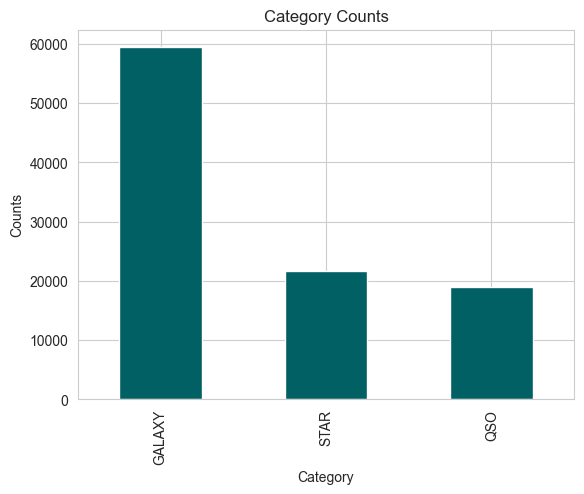

class
GALAXY    59445
STAR      21594
QSO       18961
Name: count, dtype: int64

In [11]:
d_category_count = data["class"].value_counts()
d_category_count.plot(kind="bar", color="#016064")
plt.title("Category Counts")
plt.xlabel("Category")
plt.ylabel("Counts")
plt.show()
d_category_count

## Boxploty

### Boxploty dla poszczególnych atrybutów w zbiorze danych treningowych

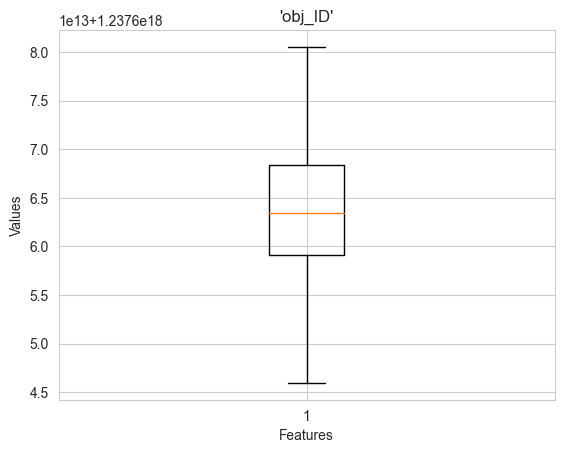

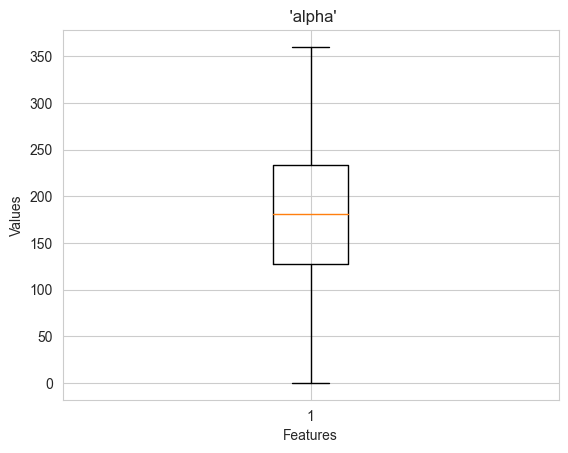

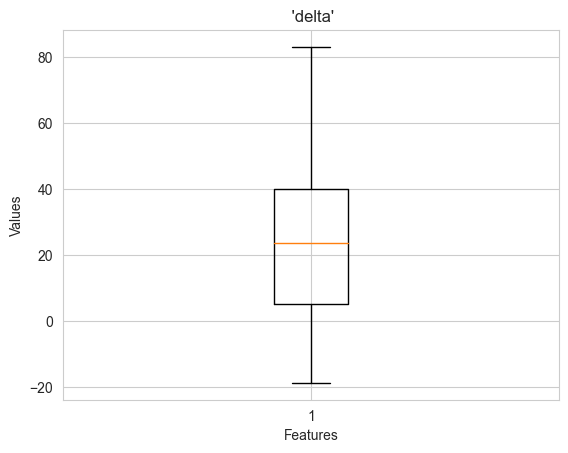

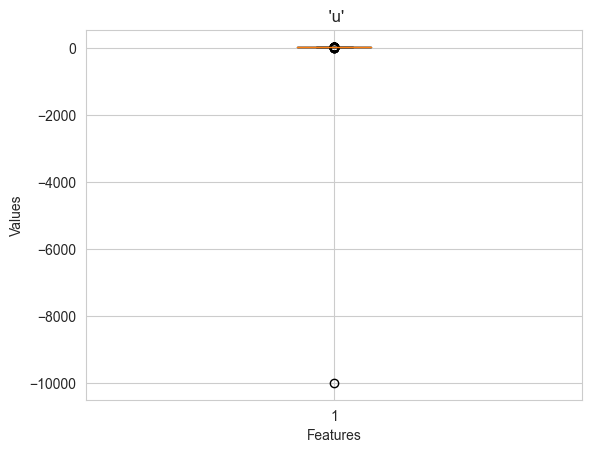

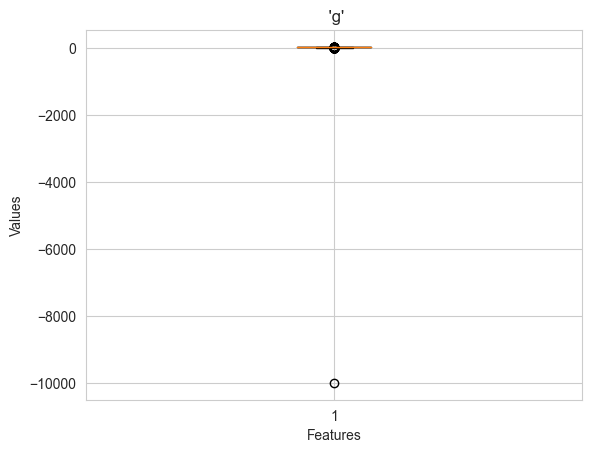

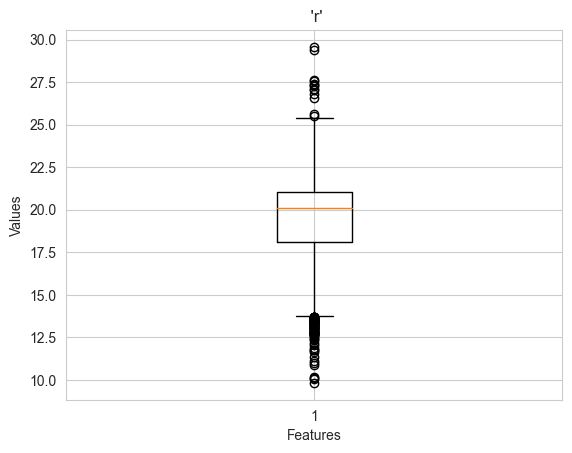

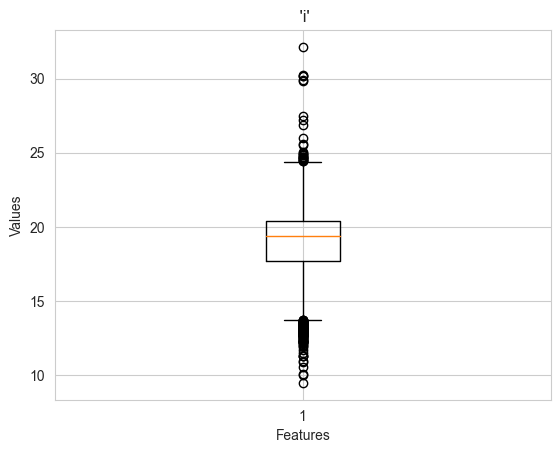

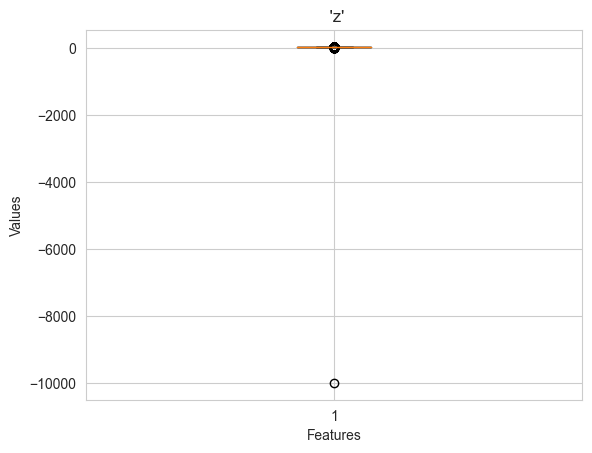

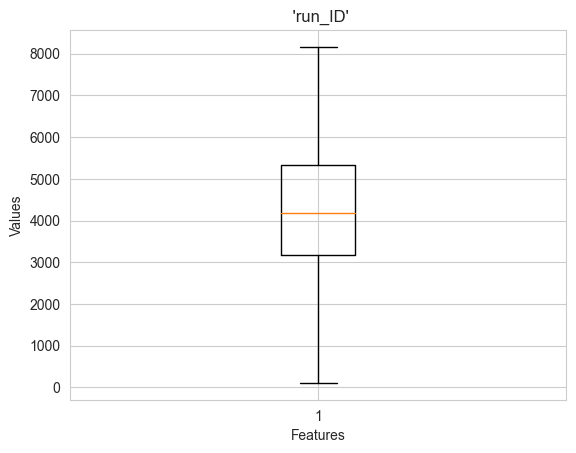

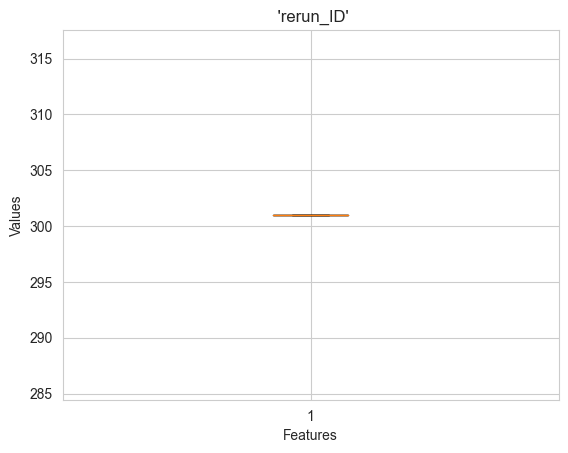

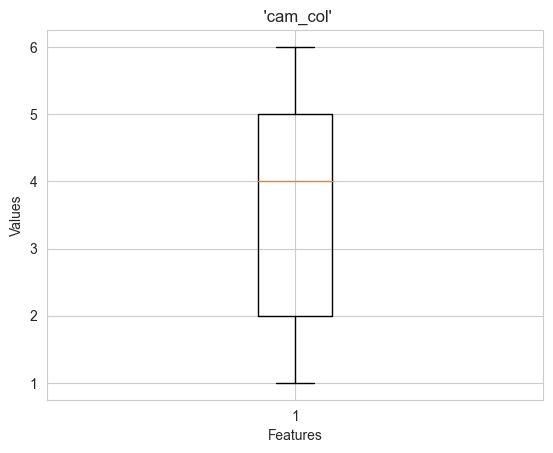

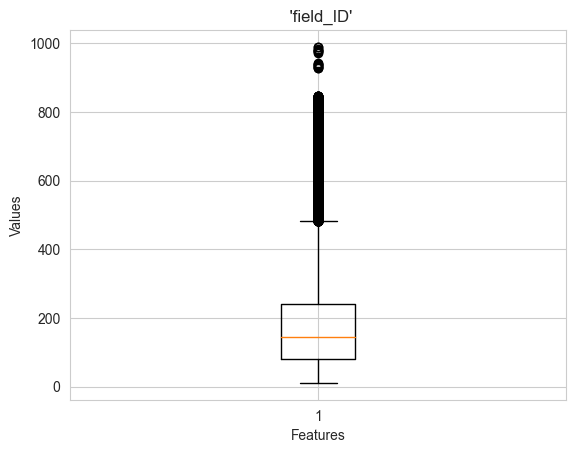

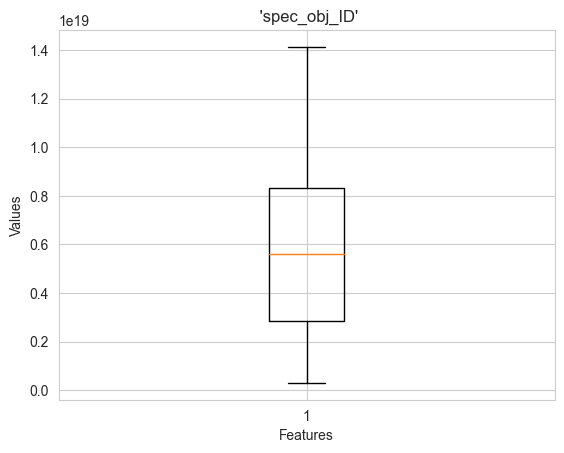

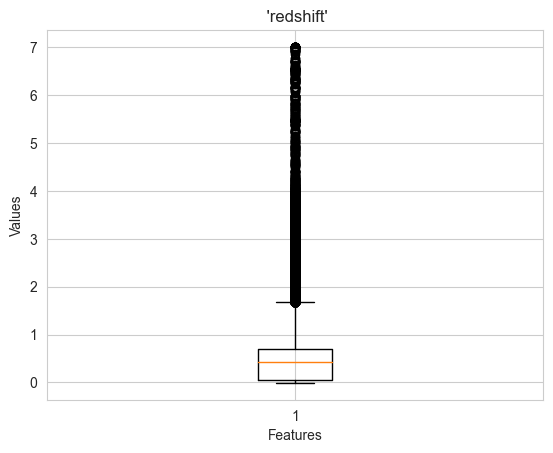

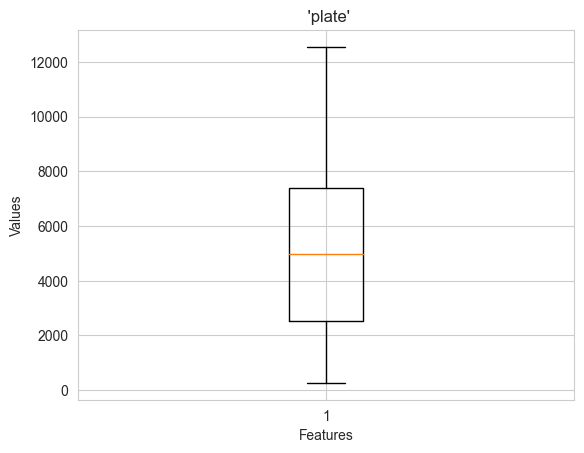

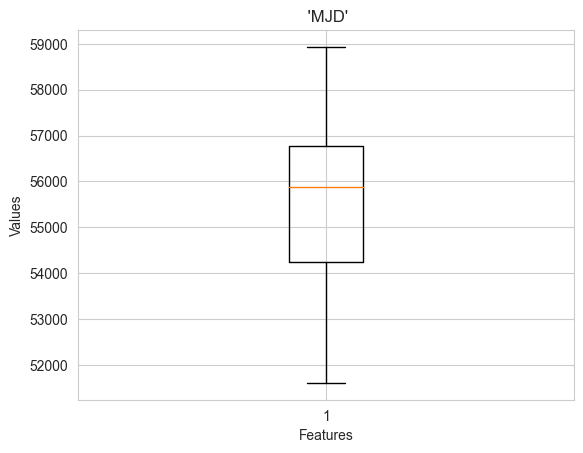

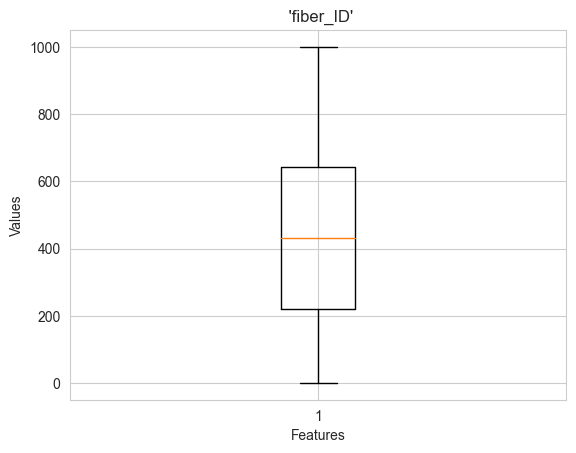

In [12]:
for column in X_train.columns:
    plt.figure()
    plt.boxplot(X_train[column])
    plt.title(column)
    plt.xlabel("Features")
    plt.ylabel("Values")

### Boxploty dla poszczególnych atrybutów w zbiorze wszystkich danych

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

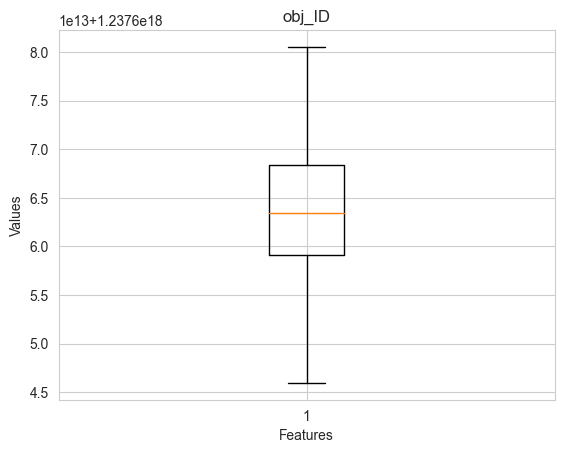

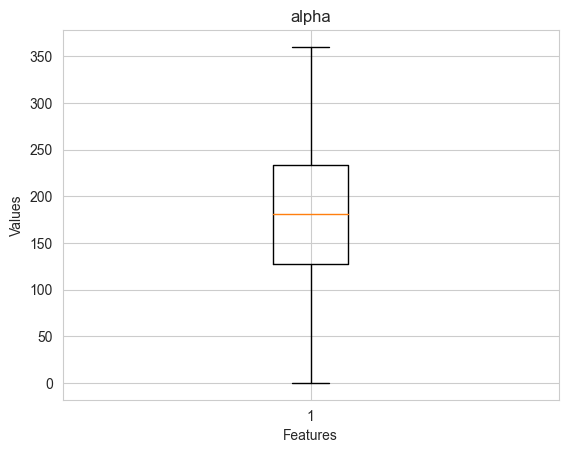

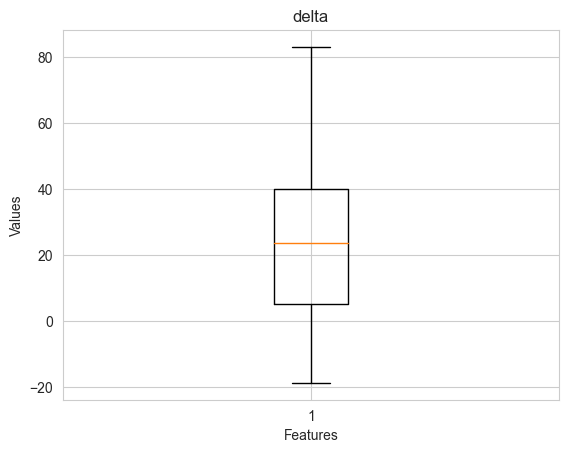

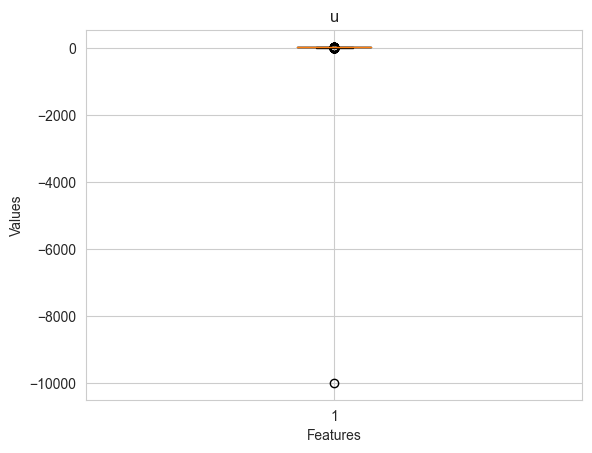

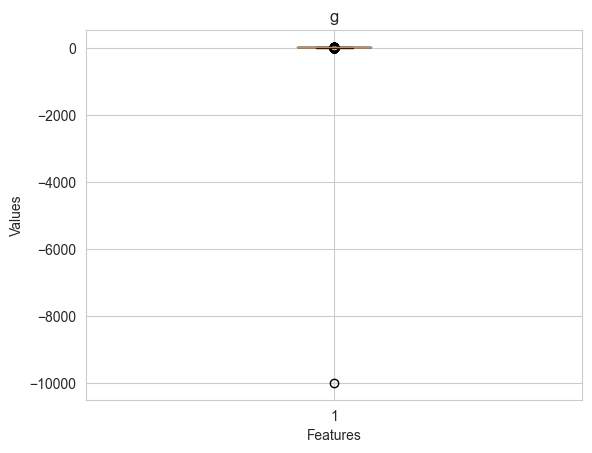

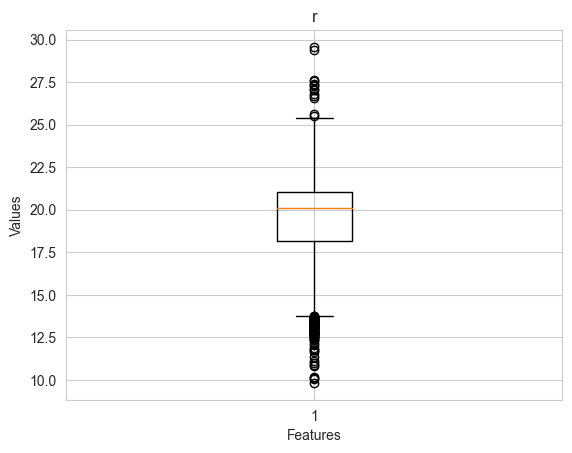

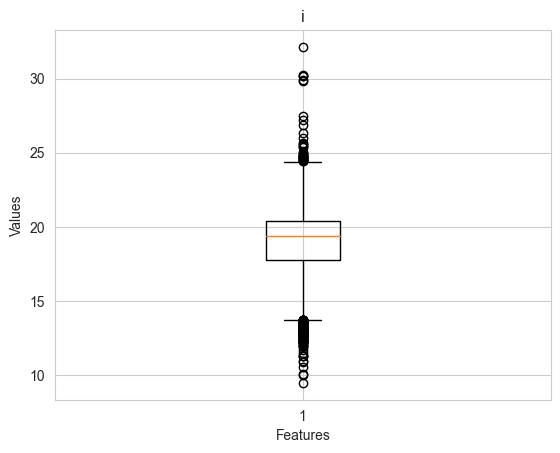

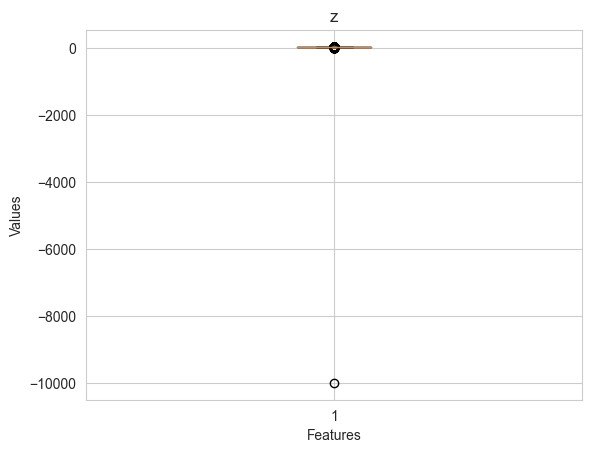

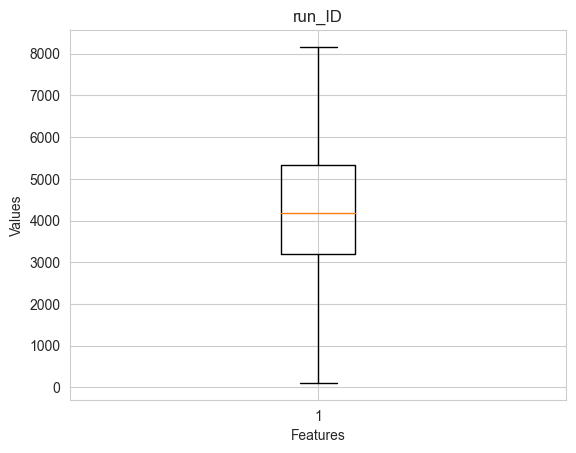

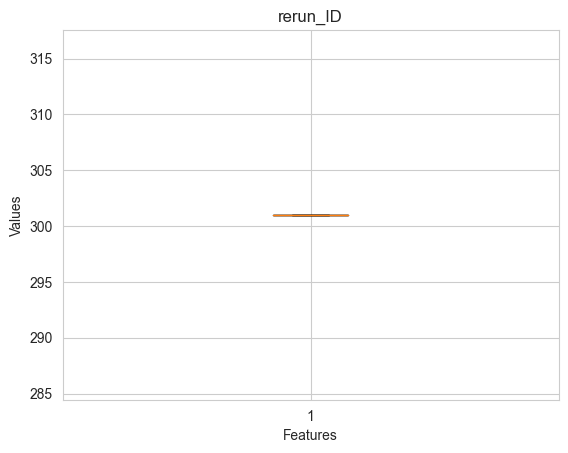

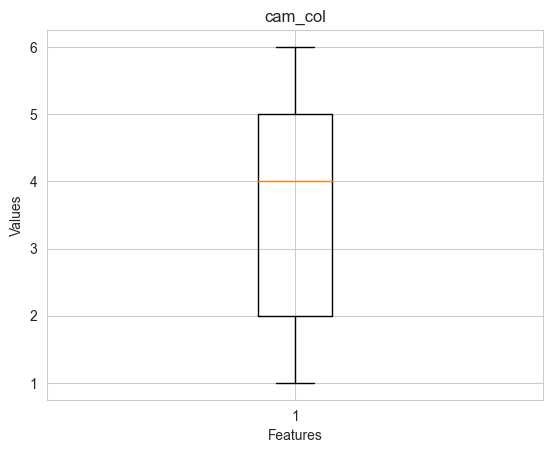

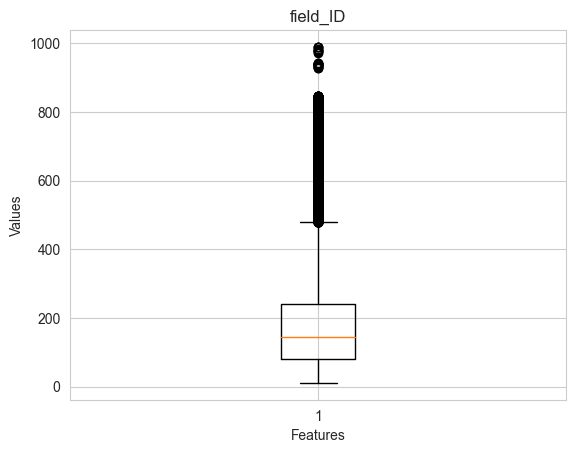

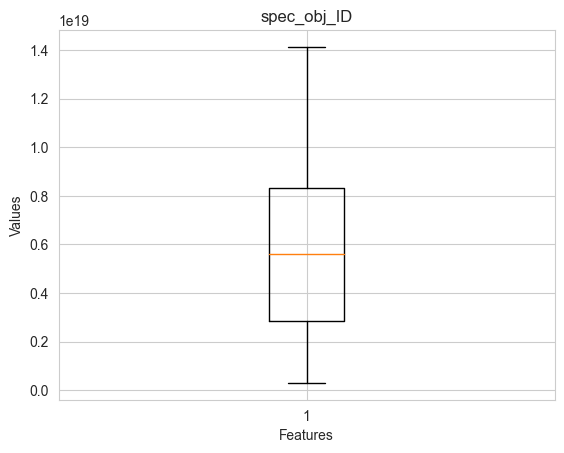

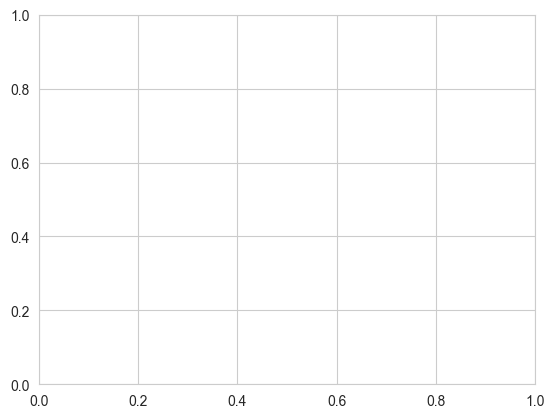

In [13]:
for column in data.columns:
    plt.figure()  # Create a new figure for each boxplot
    plt.boxplot(data[column])
    plt.title(column)  # Set the title as the column name
    plt.xlabel("Features")  # Customize the x-axis label if needed
    plt.ylabel("Values")  # Customize the y-axis label if needed

In [ ]:
data.hist(figsize=(20, 20))
plt.show()

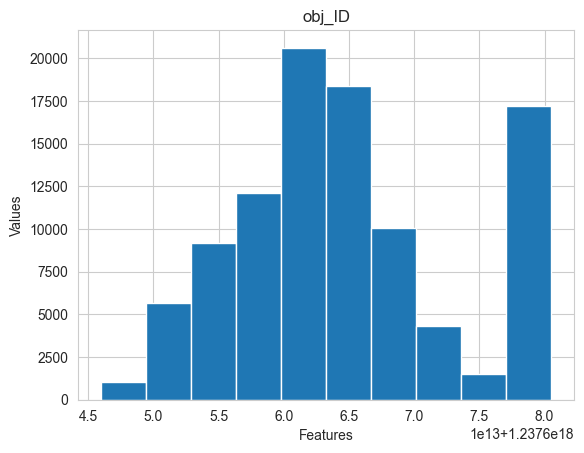

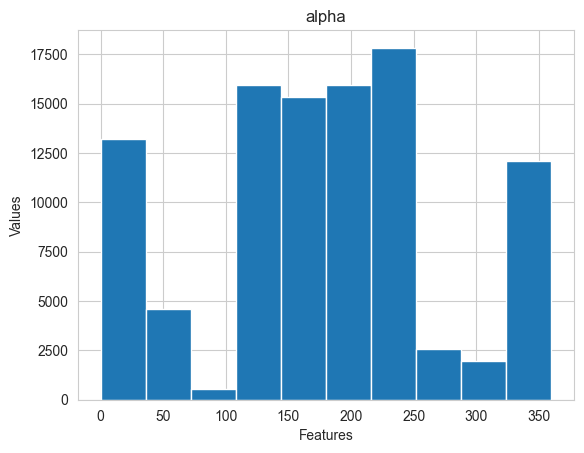

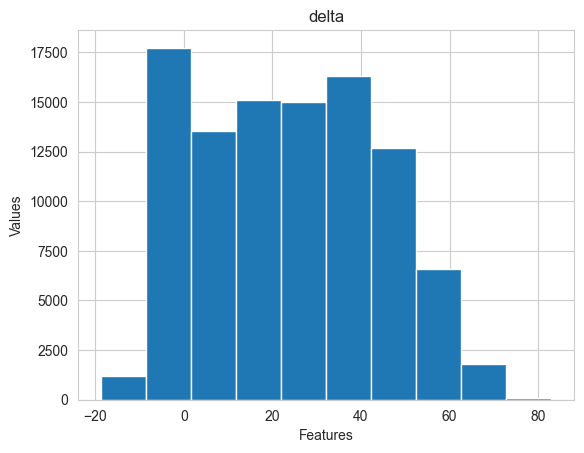

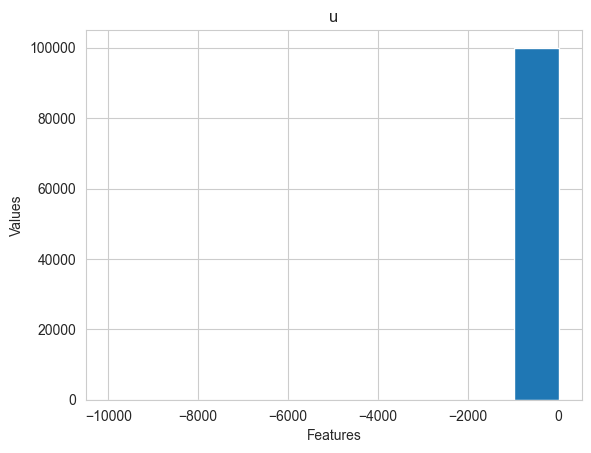

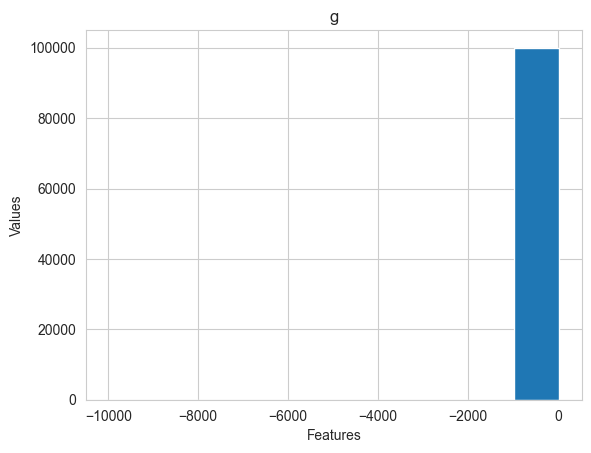

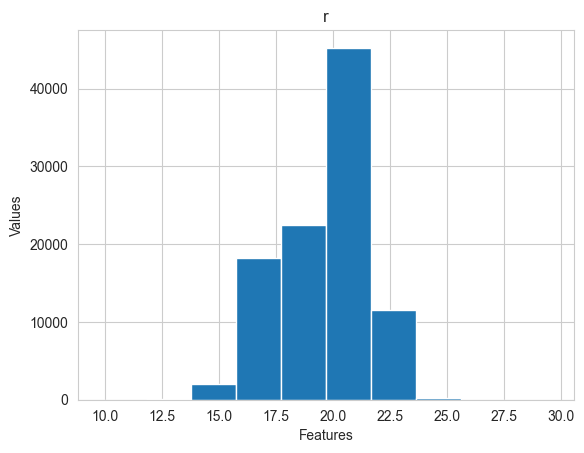

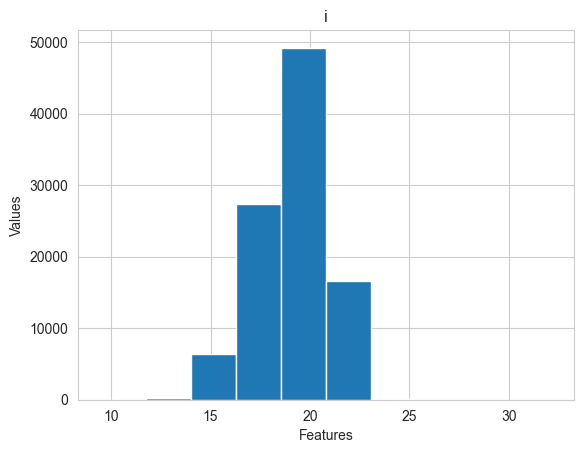

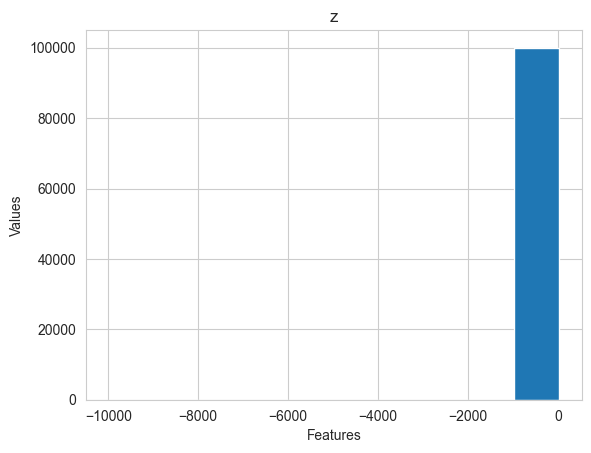

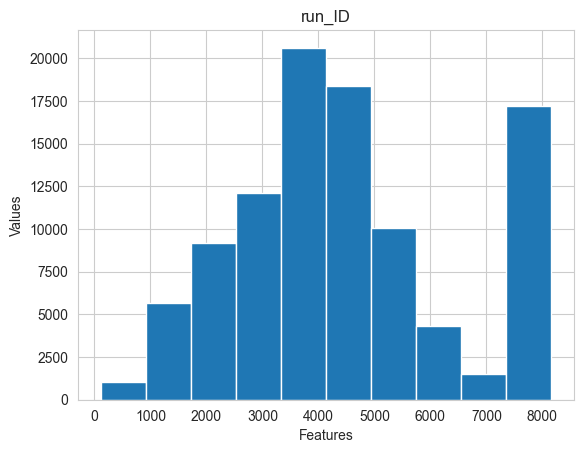

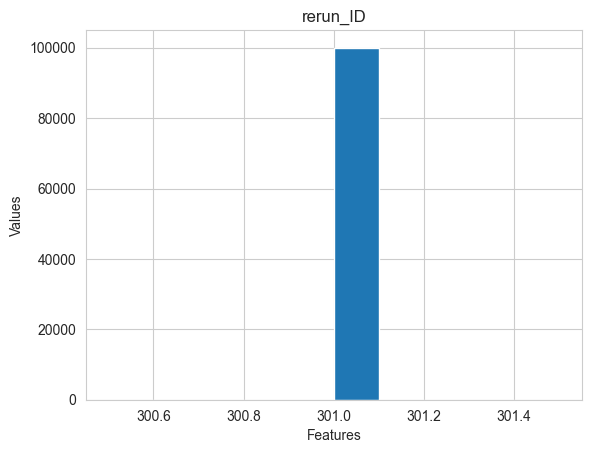

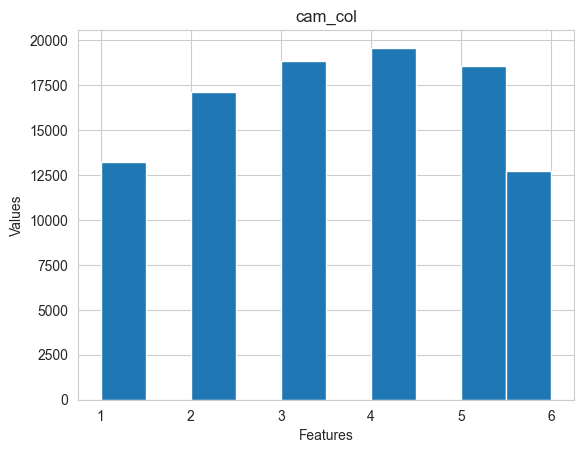

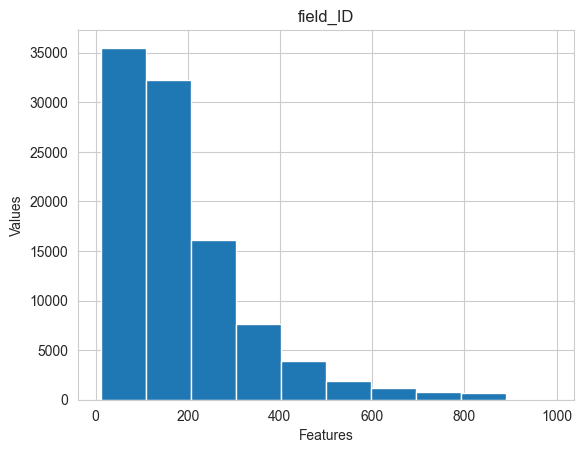

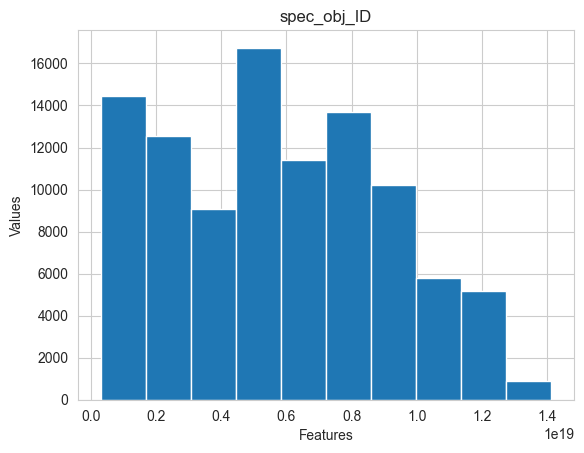

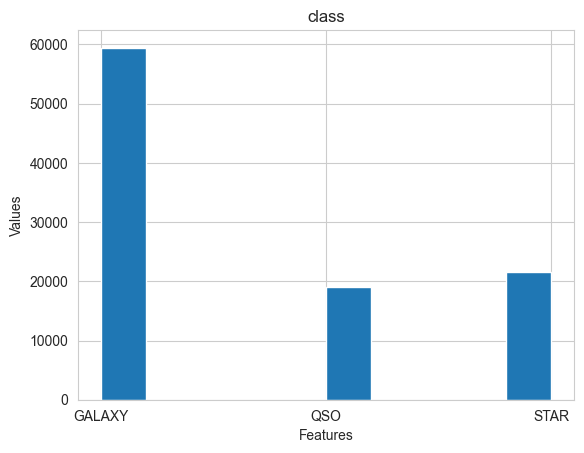

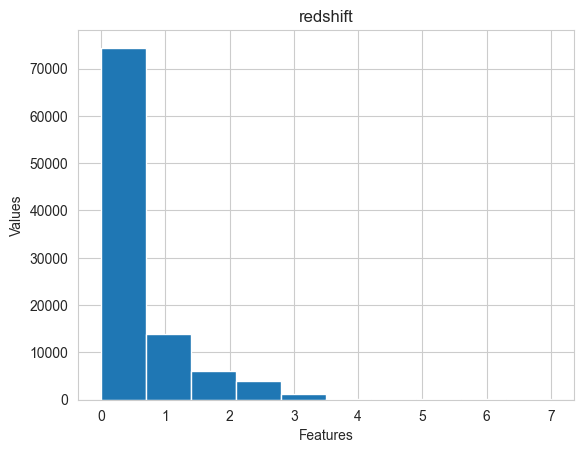

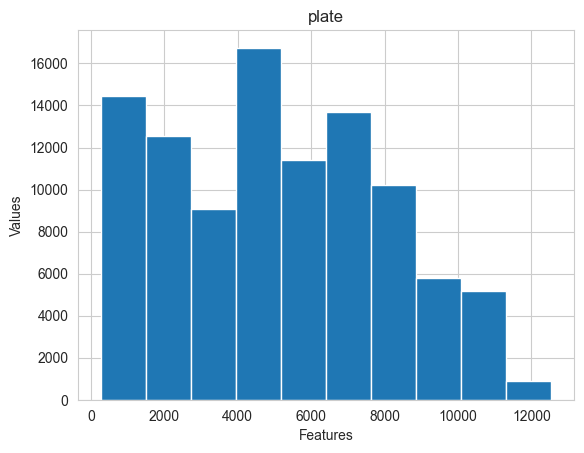

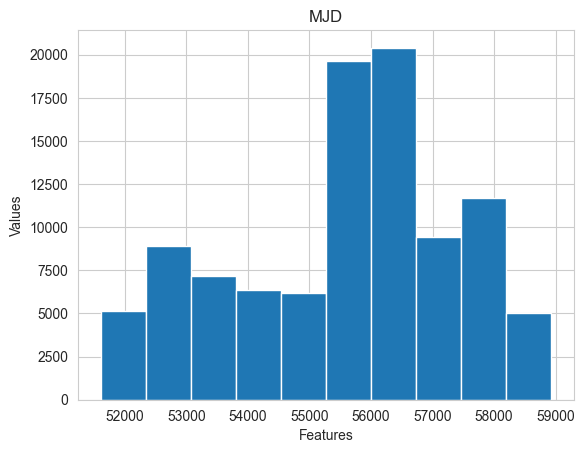

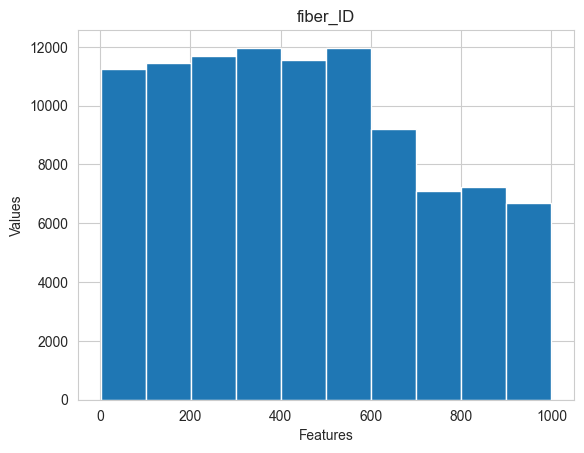

In [17]:
for column in data.columns:
    plt.figure()
    plt.hist(data[column])
    plt.title(column)
    plt.xlabel("Features")
    plt.ylabel("Values")

ValueError: num must be an integer with 1 <= num <= 15, not 16

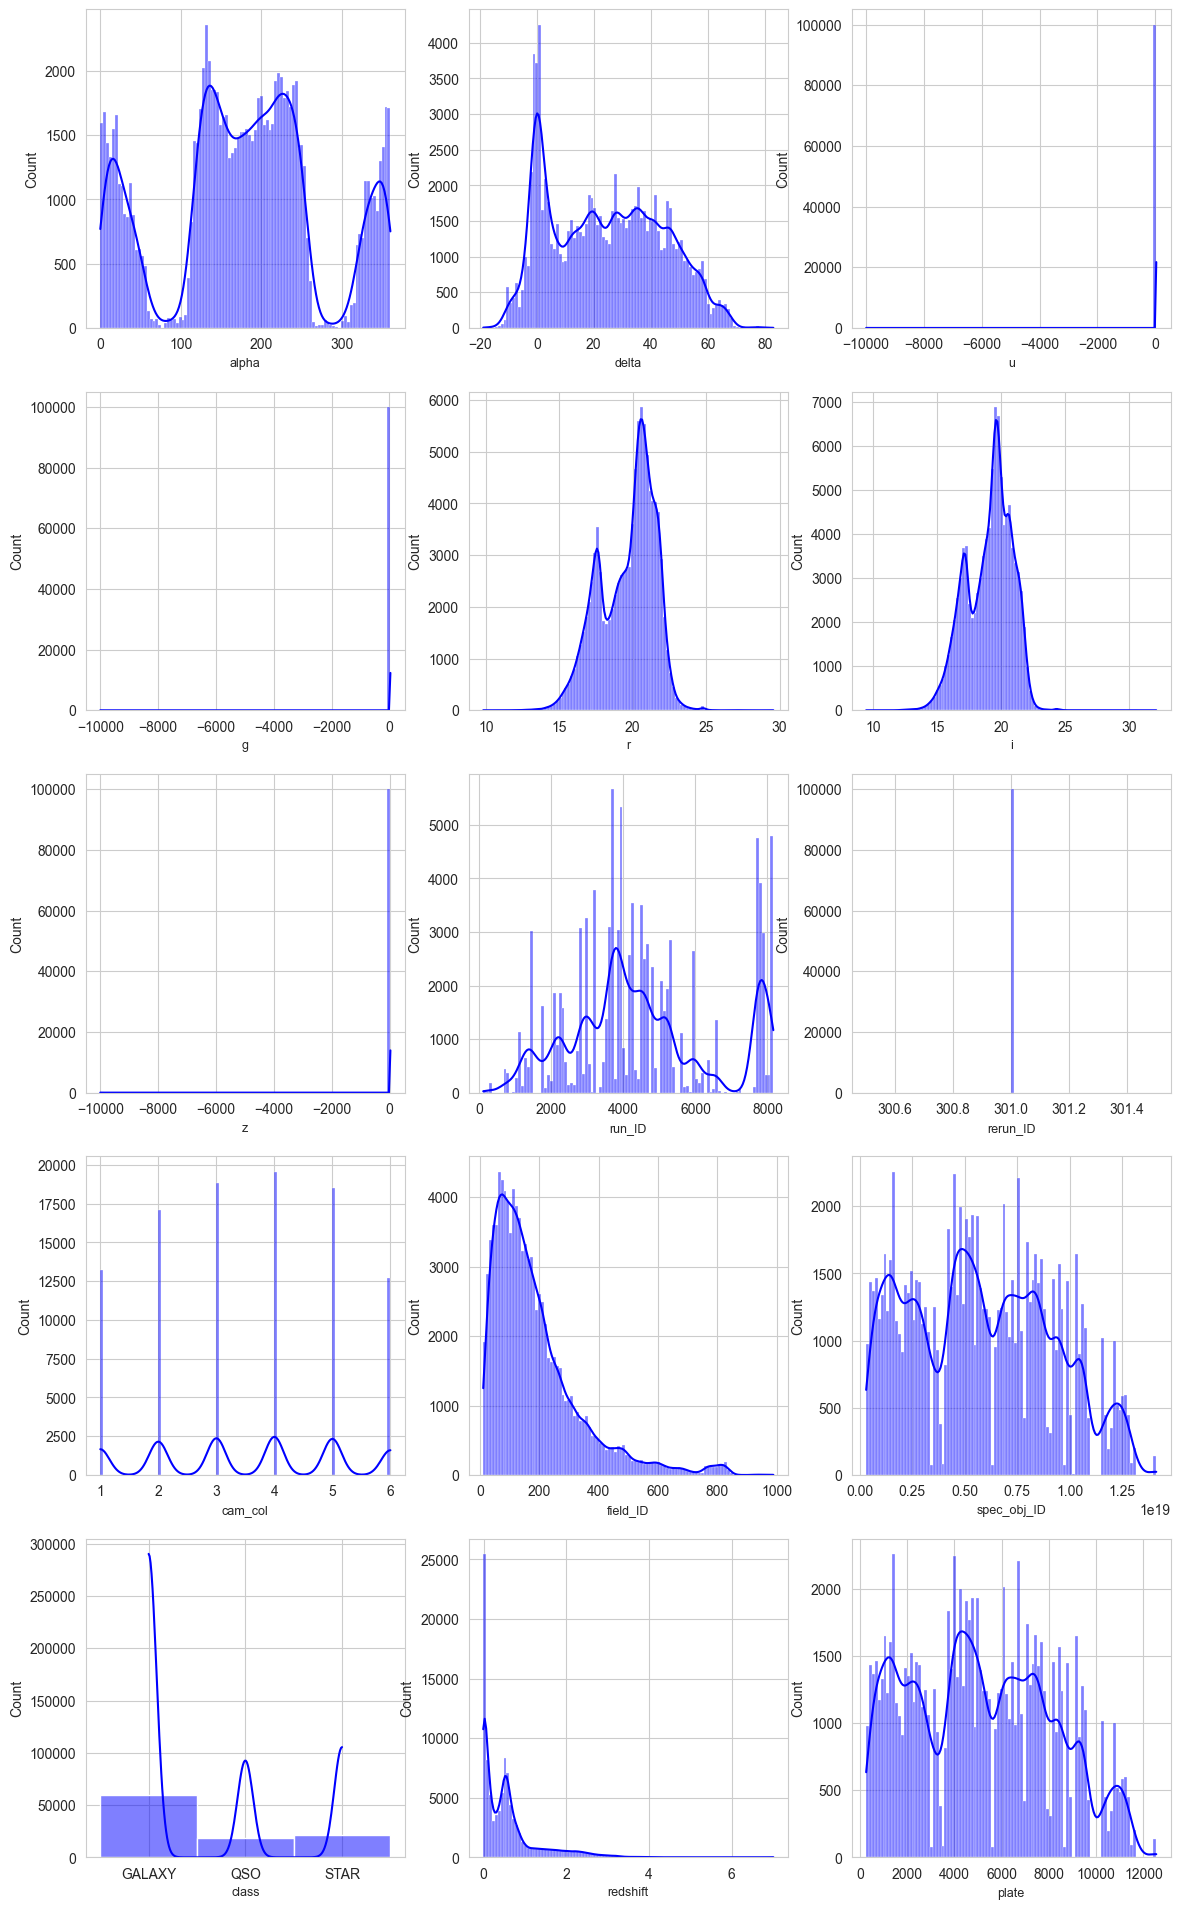

In [18]:
data = data.drop(columns=["obj_ID"])
fig, ax = plt.subplots(5, 3, figsize=(14, 24))
i=0
for i, feature in enumerate(data):
    plt.subplot(5, 3, i+1)
    sns.histplot(data[feature],
                 color="blue",
                 kde=True,
                 bins=100)
    plt.xlabel(feature, fontsize=9)
plt.show()